In [1]:
#Kullanacağımız kütüphaneleri import ettik

import cv2
import pandas as pd
import numpy as np
from PIL import Image
import glob
from matplotlib import pyplot as plt
import matplotlib.image as image
from skimage.filters import prewitt_h,prewitt_v
from skimage.io import imread, imshow
import os
from tabulate import tabulate

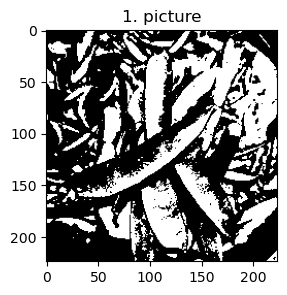

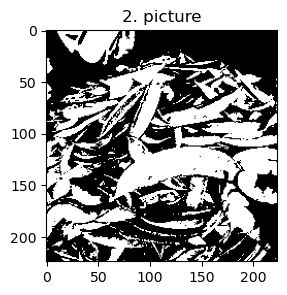

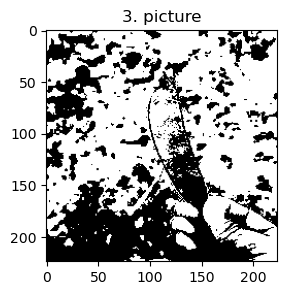

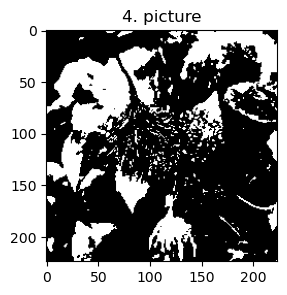

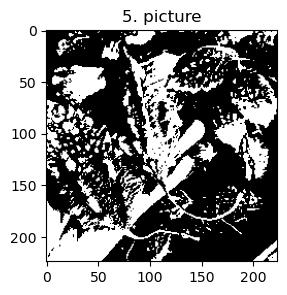

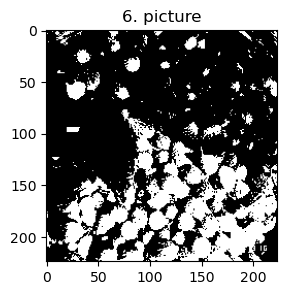

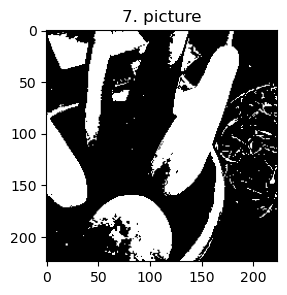

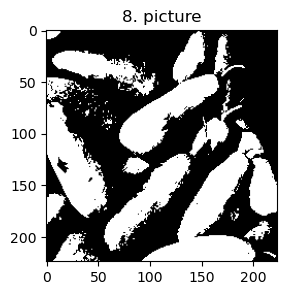

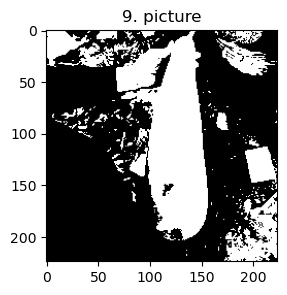

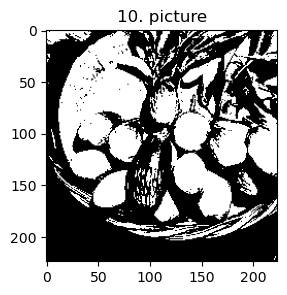

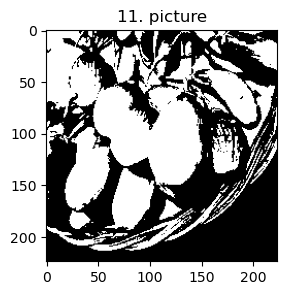

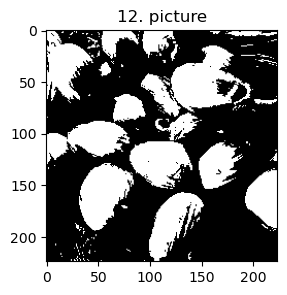

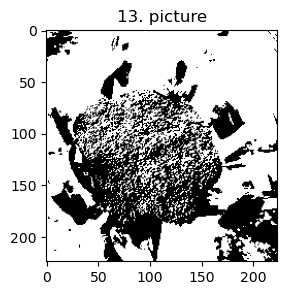

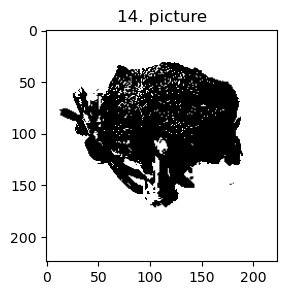

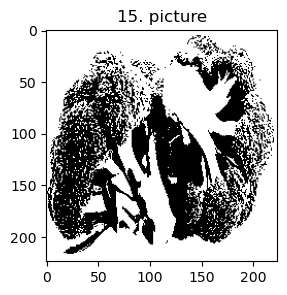

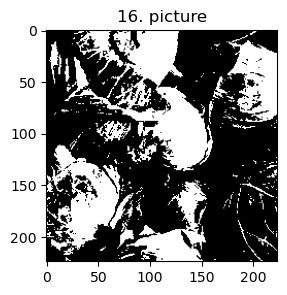

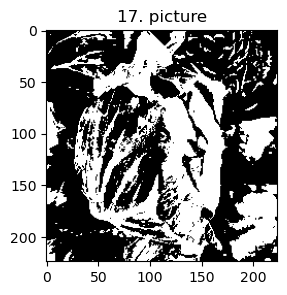

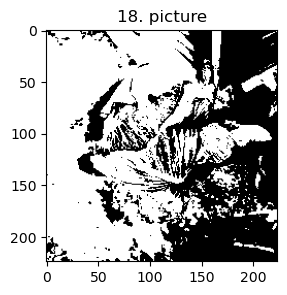

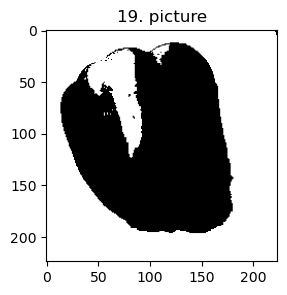

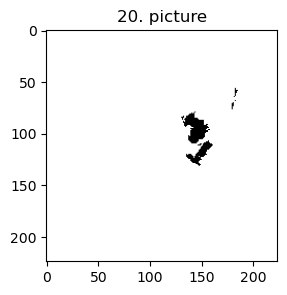

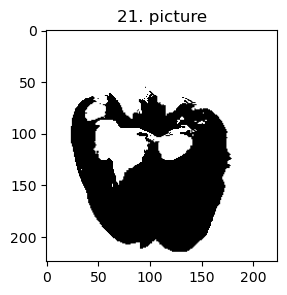

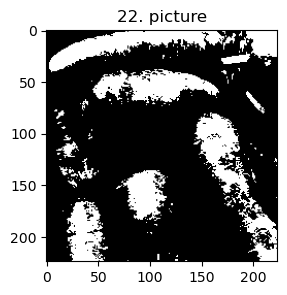

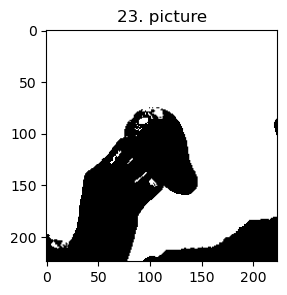

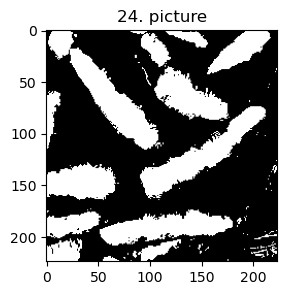

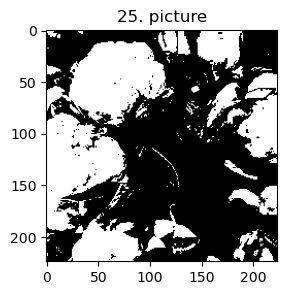

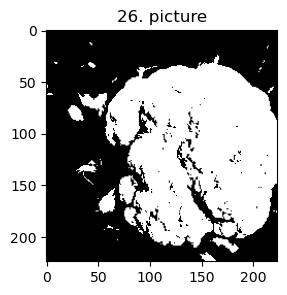

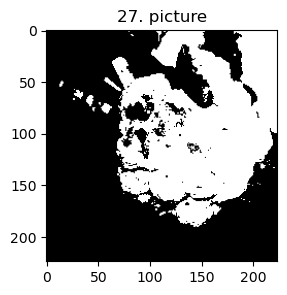

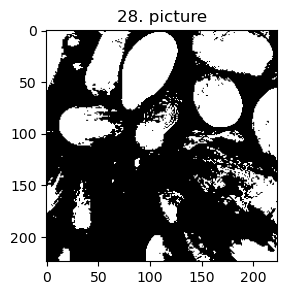

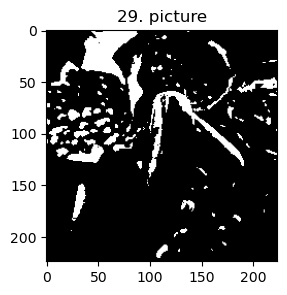

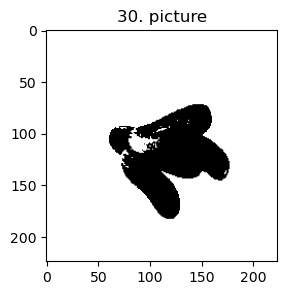

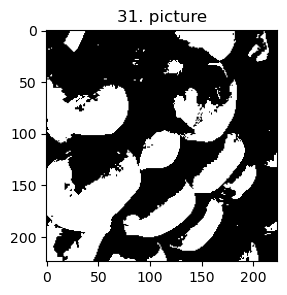

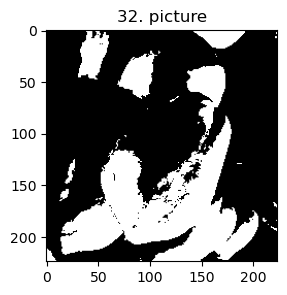

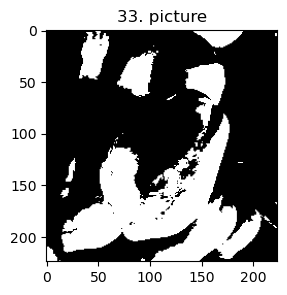

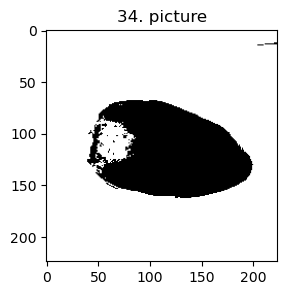

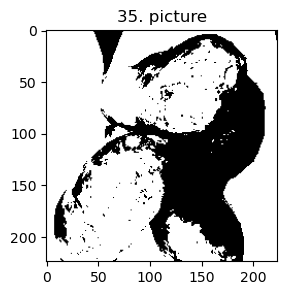

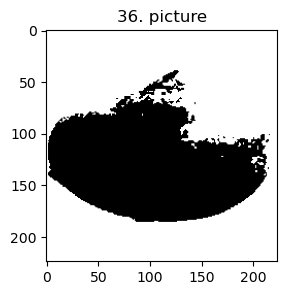

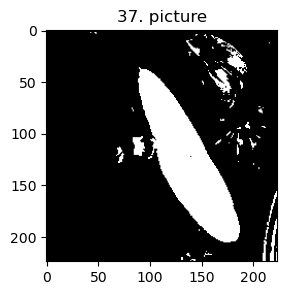

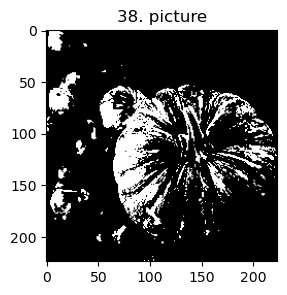

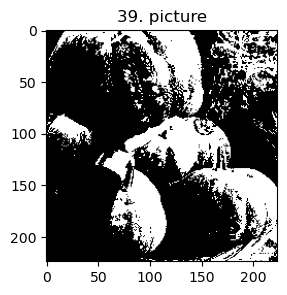

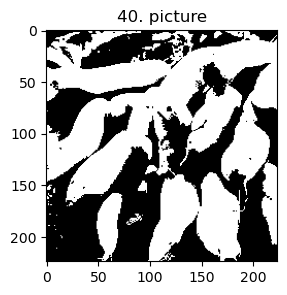

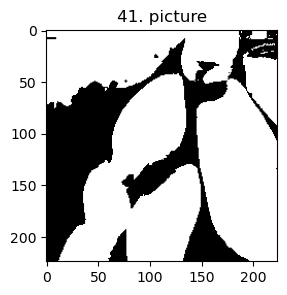

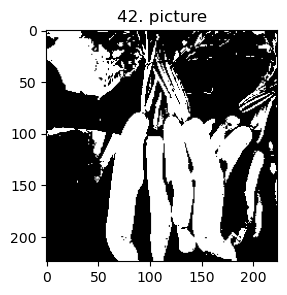

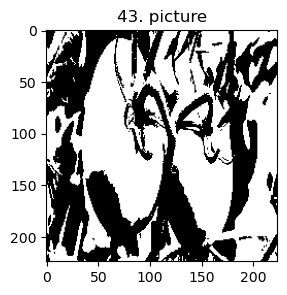

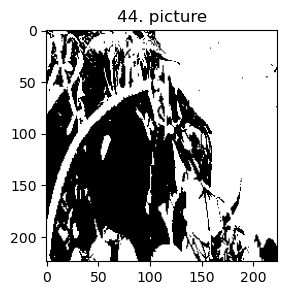

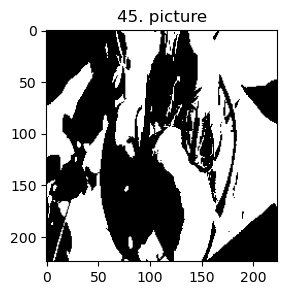

In [37]:
#For döngüsü kullanarak tüm fotoğrafları alıp siyah-beyaz forma çevirip bastırdık

images = len(os.listdir('/Users/zex/Desktop/image_dataset_analysis/veg'))

for i in range(1,images):
    img = cv2.imread(f'/Users/zex/Desktop/image_dataset_analysis/veg/{i}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, bnw_img) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(3,3))
    plt.imshow(bnw_img, cmap='gray')
    plt.title(f'{i}. picture')
    plt.show()


In [38]:
#For döngüsü kullanarak tüm fotoğrafların boyutlarını yazdırdık

images = len(os.listdir('/Users/zex/Desktop/image_dataset_analysis/veg'))

for i in range(1,images):
    img = cv2.imread(f'/Users/zex/Desktop/image_dataset_analysis/veg/{i}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, bnw_img) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    print(f"Fotoğraf {i}'in boyutu: " + str(bnw_img.shape))


Fotoğraf 1'in boyutu: (224, 224)
Fotoğraf 2'in boyutu: (224, 224)
Fotoğraf 3'in boyutu: (224, 224)
Fotoğraf 4'in boyutu: (224, 224)
Fotoğraf 5'in boyutu: (224, 224)
Fotoğraf 6'in boyutu: (224, 224)
Fotoğraf 7'in boyutu: (224, 224)
Fotoğraf 8'in boyutu: (224, 224)
Fotoğraf 9'in boyutu: (224, 224)
Fotoğraf 10'in boyutu: (224, 224)
Fotoğraf 11'in boyutu: (224, 224)
Fotoğraf 12'in boyutu: (224, 224)
Fotoğraf 13'in boyutu: (224, 224)
Fotoğraf 14'in boyutu: (224, 224)
Fotoğraf 15'in boyutu: (224, 224)
Fotoğraf 16'in boyutu: (224, 224)
Fotoğraf 17'in boyutu: (224, 224)
Fotoğraf 18'in boyutu: (224, 224)
Fotoğraf 19'in boyutu: (224, 224)
Fotoğraf 20'in boyutu: (224, 224)
Fotoğraf 21'in boyutu: (224, 224)
Fotoğraf 22'in boyutu: (224, 224)
Fotoğraf 23'in boyutu: (224, 224)
Fotoğraf 24'in boyutu: (224, 224)
Fotoğraf 25'in boyutu: (224, 224)
Fotoğraf 26'in boyutu: (224, 224)
Fotoğraf 27'in boyutu: (224, 224)
Fotoğraf 28'in boyutu: (224, 224)
Fotoğraf 29'in boyutu: (224, 224)
Fotoğraf 30'in boyutu: 

In [39]:
#For döngüsü kullanarak tüm fotoğrafları matrix formuna çevirip csv formatında kaydettik

images = len(os.listdir('/Users/zex/Desktop/image_dataset_analysis/veg'))

for i in range(1,images):    
    img = cv2.imread(f'/Users/zex/Desktop/image_dataset_analysis/veg/{i}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, bnw_img) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

    arr = np.asarray(bnw_img)
    df = pd.DataFrame(arr)
    df.to_csv(f"data{i}.csv")

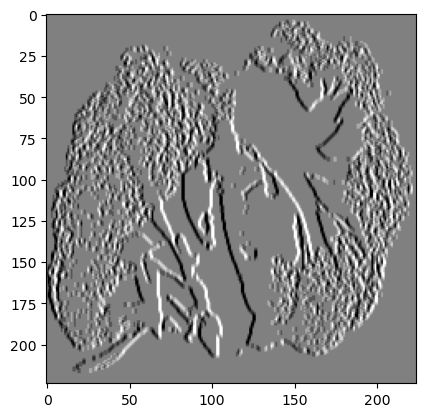

In [40]:
#Fotoğraflara 'edge feature extracting' uyguluyoruz ve kaydediyoruz

img = cv2.imread('/Users/zex/Desktop/image_dataset_analysis/veg/15.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, bnw_img) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

edges_prewitt_horizontal = prewitt_h(bnw_img)
edges_prewitt_vertical = prewitt_v(bnw_img)
plt.imshow(edges_prewitt_vertical, cmap='gray')
plt.savefig('15_efe.jpg')

In [41]:
#Tüm fotoğrafların RGB kanallarının teker teker ortalama değerlerini aldırıp, yazdırdık ve csv formatında kaydettik

images = len(os.listdir('/Users/zex/Desktop/image_dataset_analysis/veg'))
data = []

for i in range(1,images):
    img = cv2.imread(f'/Users/zex/Desktop/image_dataset_analysis/veg/{i}.jpg')
    R = np.mean(img[:,:,2])
    G = np.mean(img[:,:,1])
    B = np.mean(img[:,:,0])
    
    data.append([f'Fotoğraf {i}: ', R, G, B])
    
arr = np.array(data)
df = pd.DataFrame(arr)
df.set_axis(['İsim', 'R Ortalama', 'G Ortalama', 'B Ortalama'], axis='columns', inplace=True)
df.to_csv(f"RGB-ortalama-deger-verileri.csv")
print(df)

             İsim          R Ortalama          G Ortalama          B Ortalama
0    Fotoğraf 1:     94.7571946747449  127.08107461734694   76.69993622448979
1    Fotoğraf 2:   112.17693718112245   128.1268933354592   64.39273756377551
2    Fotoğraf 3:    134.4247448979592  127.22779815051021  117.17311065051021
3    Fotoğraf 4:    87.36886160714286  108.91181042729592   67.21394690688776
4    Fotoğraf 5:    97.43385283801021  108.58260921556122  55.194555165816325
5    Fotoğraf 6:    104.8599928252551  112.20701132015306  48.197624362244895
6    Fotoğraf 7:    99.39772002551021   106.6182637117347  53.987025669642854
7    Fotoğraf 8:    86.99900350765306  122.00709502551021   64.64967315051021
8    Fotoğraf 9:   112.85140306122449  103.25938695790816    77.7924505739796
9   Fotoğraf 10:    100.7992865114796  113.87567761479592   82.38354990433673
10  Fotoğraf 11:     99.4624322385204  121.25267059948979   78.42325015943878
11  Fotoğraf 12:   101.07665019132654  106.46450494260205   63.4

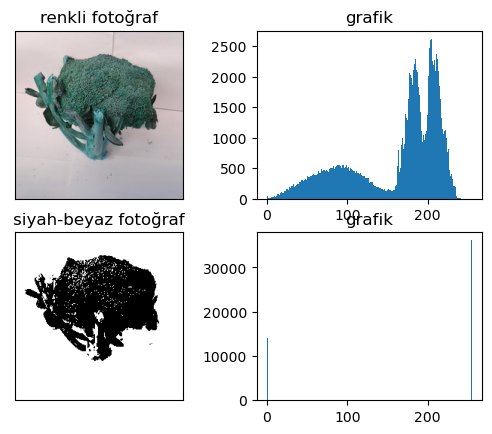

In [42]:
#Bu bölümde dataset içinden seçtiğimiz fotoğrafın pixel yoğunluğunu grafik üzerinde gösteriyoruz

img = cv2.imread('/Users/zex/Desktop/image_dataset_analysis/veg/14.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, bnw_img) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

#renkli fotoğraf

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('renkli fotoğraf')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.hist(img.ravel(),256,[0,255])
plt.title('grafik')

#siyah-beyaz fotoğraf

plt.subplot(2,2,3)
plt.imshow(bnw_img, cmap='gray')
plt.title('siyah-beyaz fotoğraf')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.hist(bnw_img.ravel(),256,[0,255])
plt.title('grafik')

plt.show()